In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report

# Data Collection

In [2]:
credit = pd.read_csv("C:/Users/manth/Assignment/Logistic/creditcard.csv")
credit.drop(["sr_no"],inplace=True,axis = 1)
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
# Converting categorical columns to its numerical codes

credit["card"] = credit["card"].astype('category')
credit["card"] = credit["card"].cat.codes

credit['owner'] = credit['owner'].astype('category')
credit['owner'] = credit['owner'].cat.codes

credit['selfemp'] = credit['selfemp'].astype('category')
credit['selfemp'] = credit['selfemp'].cat.codes

credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


# Exploratory Data Analysis (EDA)

In [4]:
credit.describe()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.775588,0.456406,33.213103,3.365376,0.068732,185.057071,0.440485,0.068992,0.993935,55.267627,0.817286,6.996967
std,0.417353,1.345267,10.142783,1.693902,0.094656,272.218917,0.496634,0.253536,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,0.000000,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.250000,2.900000,0.038827,101.298300,0.000000,0.000000,1.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093617,249.035800,1.000000,0.000000,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,1.000000,1.000000,6.000000,540.000000,1.000000,46.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
card           1319 non-null int8
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null int8
selfemp        1319 non-null int8
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
dtypes: float64(4), int64(5), int8(3)
memory usage: 96.7 KB


In [6]:
credit.isnull().sum()        #checking for null value

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

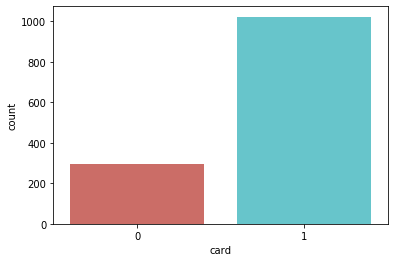

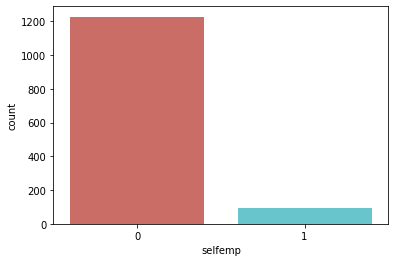

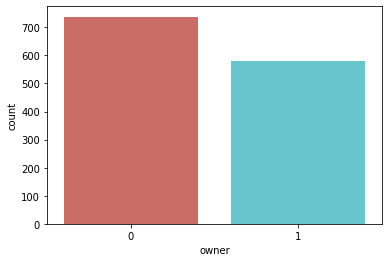

In [7]:
# Getting the barplot for the categorical columns
sns.countplot(x="card",data=credit,palette="hls")
plt.show()
sns.countplot(x="selfemp",data=credit,palette="hls")
plt.show()
sns.countplot(x="owner",data=credit,palette="hls")
plt.show()

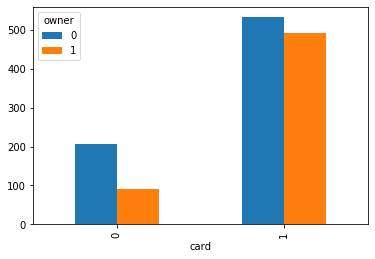

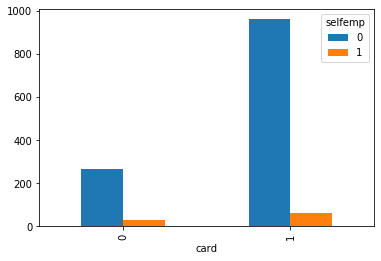

In [8]:
pd.crosstab(credit.card,credit.owner).plot(kind="bar")
pd.crosstab(credit.card,credit.selfemp).plot(kind="bar")
plt.show()

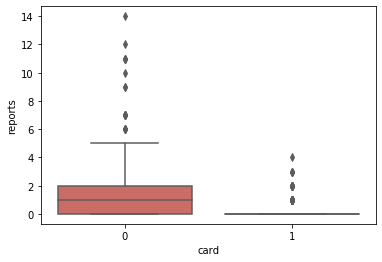

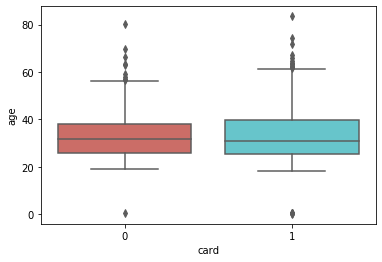

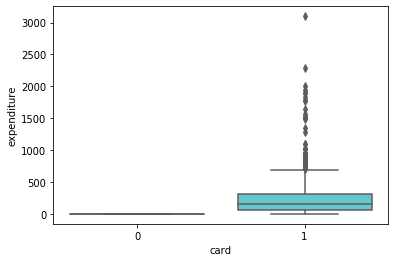

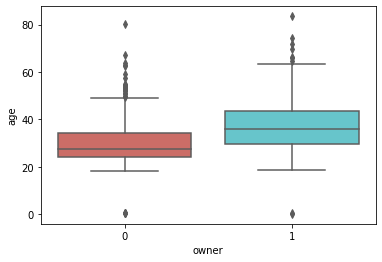

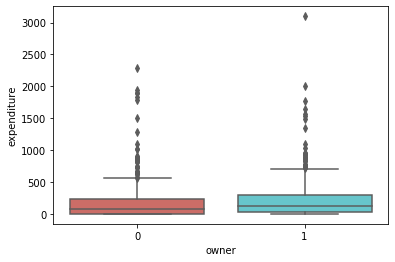

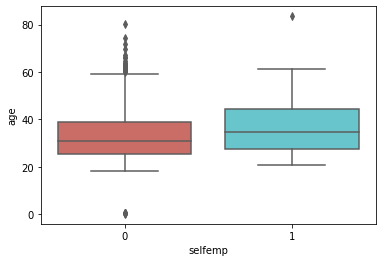

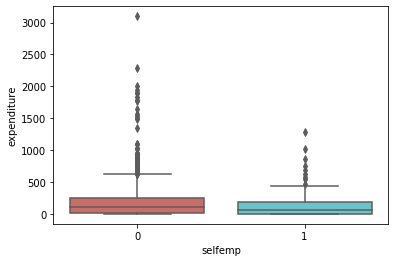

In [9]:
# Data Distribution - Boxplot of continuous variables wrt to category of categorical columns

sns.boxplot(x="card",y="reports",data=credit,palette="hls")
plt.show()
sns.boxplot(x="card",y="age",data=credit,palette="hls")
plt.show()
sns.boxplot(x="card",y="expenditure",data=credit,palette="hls")
plt.show()
sns.boxplot(x="owner",y="age",data=credit,palette="hls")
plt.show()
sns.boxplot(x="owner",y="expenditure",data=credit,palette="hls")
plt.show()
sns.boxplot(x="selfemp",y="age",data=credit,palette="hls")
plt.show()
sns.boxplot(x="selfemp",y="expenditure",data=credit,palette="hls")
plt.show()

# Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
Y = credit.iloc[:,[0]]

classifier = LogisticRegression()
classifier.fit(X,Y)

classifier.coef_ # coefficients of features 

C:\Users\manth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.65509892e+00, -3.11259048e-03, -2.05627500e-01,
        -6.17010295e-04,  1.61855364e+00,  6.20454990e-01,
         2.29555725e-01, -6.64242088e-01, -1.60414462e-03,
         3.43439831e-02,  7.65660467e-02]])

In [11]:
classifier.predict_proba (X) # Probability values

array([[0.00000000e+00, 1.00000000e+00],
       [2.01651286e-06, 9.99997983e-01],
       [1.49800861e-09, 9.99999999e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [12]:
y_pred = classifier.predict(X)
credit["y_pred"] = y_pred
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,y_pred
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1


In [13]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
y_prob.head()

,0,1
0,0.000000e+00,1.000000
1,2.016513e-06,0.999998
2,1.498009e-09,1.000000
3,0.000000e+00,1.000000
4,0.000000e+00,1.000000


In [14]:
new_df = pd.concat([credit,y_prob],axis=1).sort_index()
new_df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,y_pred,0,1
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1,0.000000e+00,1.000000
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1,2.016513e-06,0.999998
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1,1.498009e-09,1.000000
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1,0.000000e+00,1.000000
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1,0.000000e+00,1.000000


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[ 295,    1],
       [  23, 1000]], dtype=int64)

In [16]:
print(classification_report(Y,y_pred))  # Calculates precision, recall, f1 score, support

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       296
           1       1.00      0.98      0.99      1023

    accuracy                           0.98      1319
   macro avg       0.96      0.99      0.97      1319
weighted avg       0.98      0.98      0.98      1319



# Accuracy

In [17]:
print('Accuracy: ',metrics.accuracy_score(Y, y_pred))  # Accuracy

Accuracy:  0.9818043972706596


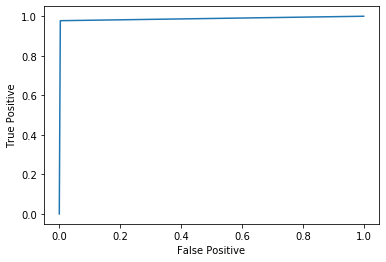

0.9870693640854931

In [18]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(credit.card, y_pred)

# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
plt.show()
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
roc_auc